In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/home/regent/Downloads/DataTalk/01/car_fuel_efficiency.csv')

len(data)

9704

In [3]:
data.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


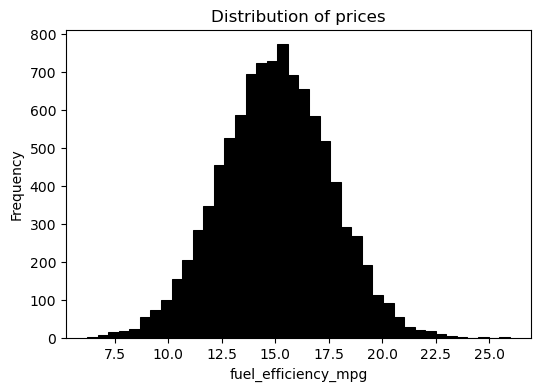

In [4]:
plt.figure(figsize=(6, 4))

sns.histplot(data.fuel_efficiency_mpg, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.title('Distribution of prices')

plt.show()

In [5]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

df = data[base]


In [6]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [7]:
data.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [8]:
data.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [9]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [10]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [11]:
df.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [12]:

    # We need to deal with missing values for the column from Q1.
    # We have two options: fill it with 0 or with the mean of this variable.
    # Try both options. For each, train a linear regression model without regularization using the code from the lessons.
    # For computing the mean, use the training only!
    # Use the validation dataset to evaluate the models and compare the RMSE of each option.
    # Round the RMSE scores to 2 decimal digits using round(score, 2)
    # Which option gives better RMSE?


In [13]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
# y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
# y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [14]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006


In [15]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [16]:
base_features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [17]:
def prepare_X(df):
    df_num = df[base_features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [18]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [19]:
y_pred = w_0 + X_train.dot(w)

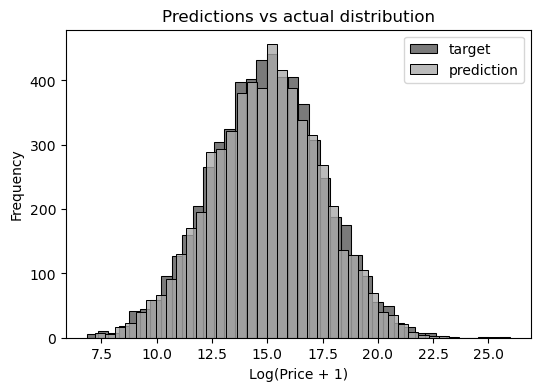

In [20]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [21]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [22]:
rmse(y_train, y_pred)

0.5202614265099076

In [23]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [24]:
score = rmse(y_val, y_pred)

round(score, 2)

0.52

In [25]:
def prepare_X_mean(df):
    df_num = df[base_features]
    df_num = df_num.fillna(df.horsepower.mean())
    X = df_num.values
    return X

In [26]:
X_train = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [27]:
y_pred = w_0 + X_train.dot(w)

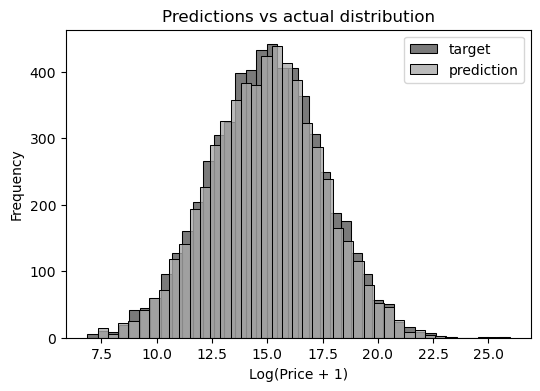

In [28]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [29]:
rmse(y_train, y_pred)

0.4624412137959964

In [30]:
X_val = prepare_X_mean(df_val)
y_pred = w_0 + X_val.dot(w)

In [31]:
score = rmse(y_val, y_pred)

round(score, 2)

0.46

In [32]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [33]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

     0 0.5173782638844466
  0.01 0.5171115525769823
   0.1 0.5187525130702517
     1 0.5222348802093141
     5 0.522891609282361
    10 0.5229812979636599
   100 0.5230636233819933


In [34]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.5171115525769823
test: 0.51658926585726


In [35]:

    # We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    # Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    # For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    # Fill the missing values with 0 and train a model without regularization.
    # For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    # What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
    # Round the result to 3 decimal digits (round(std, 3))


SyntaxError: unterminated string literal (detected at line 1) (2014587750.py, line 1)

In [36]:
scores = []
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed in seed_values:
    np.random.seed(seed)
    
    n = len(df)
    
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    rmse_score = rmse(y_val, y_pred)
    print('validation:', rmse_score)
    scores.append(rmse_score)

# for i in range (len(seed_values)):
#     print(seed_values[i], scores[i])

std = np.std(scores)
round(std, 3)




validation: 2.654146919269655
validation: 2.6512392443429635
validation: 2.6527682175276466
validation: 2.65311677101049
validation: 2.652794188387153
validation: 2.6527385831180568
validation: 2.6510543015739456
validation: 2.6510338638245785
validation: 2.6512734261700253
validation: 2.6519938622865014


0.001

In [ ]:

    # Split the dataset like previously, use seed 9.
    # Combine train and validation datasets.
    # Fill the missing values with 0 and train a model with r=0.001.
    # What's the RMSE on the test dataset?


In [44]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
9066,240,136.0,4050.512290,2006,10.304700
3073,190,141.0,3195.866942,2017,13.479434
2476,200,184.0,3006.164370,2017,16.190653
658,200,NaN,2947.143980,2022,15.446503
954,250,132.0,3114.371978,2001,14.472172
...,...,...,...,...,...
8083,200,167.0,3470.715658,2003,12.850141
6182,180,144.0,3605.310144,2016,11.681418
3886,180,154.0,3346.965671,2018,13.678140
6735,210,152.0,2500.175687,2020,17.593237


In [42]:
np.random.seed(9)

n = len(df)
   
    
n_test = int(0.2 * n)
n_train = n - n_test
    
idx = np.arange(n)
np.random.shuffle(idx)
    
df_shuffled = df.iloc[idx]
    
df_train = df_shuffled.iloc[:n_train].copy()
df_test = df_shuffled.iloc[n_train:].copy()

y_full_train = np.concatenate((y_train, y_val))
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_full_train, r=0.001)
    
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
rmse_score = rmse(y_test, y_pred)





In [40]:
y_train

array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
       18.92574819, 17.96528447])

In [43]:
rmse_score

2.452769696081445